### Main Notebook with LSTM Model.

#### Student Name: Kelvin Idogun; Student Number : 202250185

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 6.9 MB/s eta 0:00:00


### Python Libraries

In [ ]:
# Importing necessary libraries and packages for data manipulation, visualization, and machine learning
import pandas as pd  # For dataframes handling
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline  
from sklearn.model_selection import train_test_split  # For splitting the data into training and test sets
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
from sklearn.utils.class_weight import compute_class_weight  # For handling class imbalance
from imblearn.over_sampling import RandomOverSampler  # For oversampling the minority class
from sklearn.metrics import roc_curve, auc, roc_auc_score  # For evaluating the performance of binary classifiers
from sklearn.preprocessing import label_binarize  # For binarizing labels in a one-vs-all fashion
from itertools import cycle  # For iterating over items in a cyclic manner
from gensim.models import Word2Vec  # For word embedding
from nltk.tokenize import word_tokenize  # For tokenizing strings into words
from wordcloud import WordCloud  # For generating word cloud images
from collections import Counter  # For counting hashable objects
import string  # For string operations
import nltk  # For natural language processing tasks
from nltk.corpus import stopwords  # For removing common words that carry less important meaning
from textblob import TextBlob  # For processing textual data
from sklearn.decomposition import LatentDirichletAllocation  # For LDA model
from nltk.stem import WordNetLemmatizer  # For lemmatizing words
import re  # For regular expression operations
import emoji  # For working with emojis
from tensorflow.keras.preprocessing.text import Tokenizer  # For text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.utils import to_categorical  # For converting class vector to binary class matrix
from sklearn.feature_extraction.text import CountVectorizer  # For converting a collection of text to a matrix of token counts
from tensorflow.keras.models import Sequential  # For sequential model
from tensorflow.keras.layers import Embedding, LSTM, Dense  # For model layers
from tensorflow.keras.optimizers import Adam  # For optimizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # For callbacks
from tensorflow.keras.layers import Dropout  # For dropout layer
from tensorflow.keras.models import load_model  # For loading a saved model
from tensorflow.keras.backend import clear_session  # For clearing the session
from keras import backend as K  # For backend operations
from sklearn.model_selection import KFold  # For K-Fold cross-validation
import tensorflow as tf  # For TensorFlow operations
import os  # For operating system operations

In [ ]:
start_time = time.time()

In [ ]:
# Creating a directory in Google Drive to save and access project files, ensuring its existence.
directory = "LSTM Script"
parent_dir = "/content/drive/My Drive/"
path = os.path.join(parent_dir, directory)
os.makedirs(path, exist_ok=True)

In [ ]:
# Downloading necessary nltk packages for text processing
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Initial Data Cleaning and EDA

In [ ]:
# Loading the scraped review dataset from Google Drive and displaying the first few entries for a preliminary view.
Master_df = pd.read_csv("/content/drive/MyDrive/LSTM Script/scraped_reviews.csv")

In [ ]:
Master_df.head()

,business,review_title,date_of_experience,review_date,review_rating,review_text,page_number
0,www.staysure,Helpful customer services,10 October 2023,2023-10-11,5.0,I took out new travel insurance online. I want...,1
1,www.staysure,I have used Staysure foe many years,10 October 2023,2023-10-11,5.0,I have used Staysure foe many years. Fortunate...,1
2,www.staysure,"Patient, helpful, thorough",29 September 2023,2023-10-11,5.0,"If you live with a complex health condition, i...",1
3,www.staysure,Queries purchasing a Policy due for renewal,10 October 2023,2023-10-11,5.0,"We spoke with Emma today who was fantastic, sh...",1
4,www.staysure,"great service, great experience",10 October 2023,2023-10-11,5.0,"David answered the phone, was friendly, patien...",1


In [ ]:
# Gathering information about the dataset, including the number of entries, columns, and data types.
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business            260000 non-null  object 
 1   review_title        260000 non-null  object 
 2   date_of_experience  259999 non-null  object 
 3   review_date         209499 non-null  object 
 4   review_rating       231529 non-null  float64
 5   review_text         205363 non-null  object 
 6   page_number         260000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ MB


##### Cleaning Business Names

In [ ]:
Master_df["business"].unique()

array(['www.staysure', 'wise', 'www.worldremit', 'domesticandgeneral',
       '1stcentralinsurance', 'purplebricks', 'www.rac', 'www.homeserve',
       'www.allcleartravel', 'www.quidco', 'www.hastingsdirect',
       'www.topcashback', 'www.revolut', 'www.monzo', 'vitality',
       'www.lowell', 'stormgain', 'www.monese', 'www.theaa',
       'www.travelex', 'payingtoomuch', 'www.paysafecard',
       'premiumcredit', 'acemoneytransfer', 'www.esure', 'amigoloans'],
      dtype=object)

In [ ]:
#Removing all www. attachments from Business names in the business column
Master_df["business"] = Master_df["business"].str.replace('www.', '', regex=False)

In [ ]:
Master_df["business"].unique()

array(['staysure', 'wise', 'worldremit', 'domesticandgeneral',
       '1stcentralinsurance', 'purplebricks', 'rac', 'homeserve',
       'allcleartravel', 'quidco', 'hastingsdirect', 'topcashback',
       'revolut', 'monzo', 'vitality', 'lowell', 'stormgain', 'monese',
       'theaa', 'travelex', 'payingtoomuch', 'paysafecard',
       'premiumcredit', 'acemoneytransfer', 'esure', 'amigoloans'],
      dtype=object)

##### Handling Missing Reviews
To retain as much data as possible, missing 'review_text' entries are replaced with their corresponding 'review_title' if available. This approach helps preserve valuable data. After this, any rows still missing 'review_text' are removed, ensuring the dataset is complete for analysis.

In [ ]:
#Check for Corresponding Data in the review_title Column:
mask = Master_df['review_text'].isnull() & Master_df['review_title'].notnull()

In [ ]:
#Replace Missing review_text with review_title
Master_df.loc[mask, 'review_text'] = Master_df.loc[mask, 'review_title']

In [ ]:
#Drop Remaining Rows with Missing review_text
Master_df = Master_df.dropna(subset=['review_text'])

In [ ]:
missing_reviews = Master_df['review_text'].isnull().sum()
print(f"Number of missing reviews: {missing_reviews}")

Number of missing reviews: 0


In [ ]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business            260000 non-null  object 
 1   review_title        260000 non-null  object 
 2   date_of_experience  259999 non-null  object 
 3   review_date         209499 non-null  object 
 4   review_rating       231529 non-null  float64
 5   review_text         260000 non-null  object 
 6   page_number         260000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ MB


In [ ]:
Master_df = Master_df.dropna(subset=['review_title'])

In [ ]:
missing_titles = Master_df['review_title'].isnull().sum()
print(f"Number of missing titles: {missing_titles}")

Number of missing titles: 0


In [ ]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business            260000 non-null  object 
 1   review_title        260000 non-null  object 
 2   date_of_experience  259999 non-null  object 
 3   review_date         209499 non-null  object 
 4   review_rating       231529 non-null  float64
 5   review_text         260000 non-null  object 
 6   page_number         260000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ MB


##### Filling Missing Dates

Given the nature of the data collection (newest to oldest), forward and backward filling methods were employed to address missing values in the 'review_date' and 'date_of_experience' columns. This strategy ensures continuity in the temporal data.

In [ ]:
# Forward fill
Master_df['date_of_experience'] = Master_df['date_of_experience'].fillna(method='ffill')
Master_df['review_date'] = Master_df['review_date'].fillna(method='ffill')

# Backward fill for any remaining missing values
Master_df['date_of_experience'] = Master_df['date_of_experience'].fillna(method='bfill')
Master_df['review_date'] = Master_df['review_date'].fillna(method='bfill')

In [ ]:
missing_experience_dates = Master_df['date_of_experience'].isnull().sum()
missing_review_dates = Master_df['review_date'].isnull().sum()

print(f"Number of missing experience dates: {missing_experience_dates}")
print(f"Number of missing review dates: {missing_review_dates}")


Number of missing experience dates: 0
Number of missing review dates: 0


##### Removing Duplicates

This involves identifying and removing any duplicate entries in the dataset to ensure data integrity. Following the removal of duplicates, the index of the DataFrame was reset for consistent data handling in subsequent steps

In [ ]:
# checking for any duplicate in the data
Master_df.duplicated().sum()

101

In [ ]:
# Remove duplicate rows
Master_df = Master_df.drop_duplicates()

Master_df = Master_df.reset_index(drop=True)


In [ ]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259899 entries, 0 to 259898
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business            259899 non-null  object 
 1   review_title        259899 non-null  object 
 2   date_of_experience  259899 non-null  object 
 3   review_date         259899 non-null  object 
 4   review_rating       231429 non-null  float64
 5   review_text         259899 non-null  object 
 6   page_number         259899 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ MB


#### Distribution of Review Ratings

In this visualization step, creating a bar chart to illustrate the distribution of review ratings in the dataset. This helps to quickly identify any imbalances in the data, such as a prevalence of positive or negative reviews.

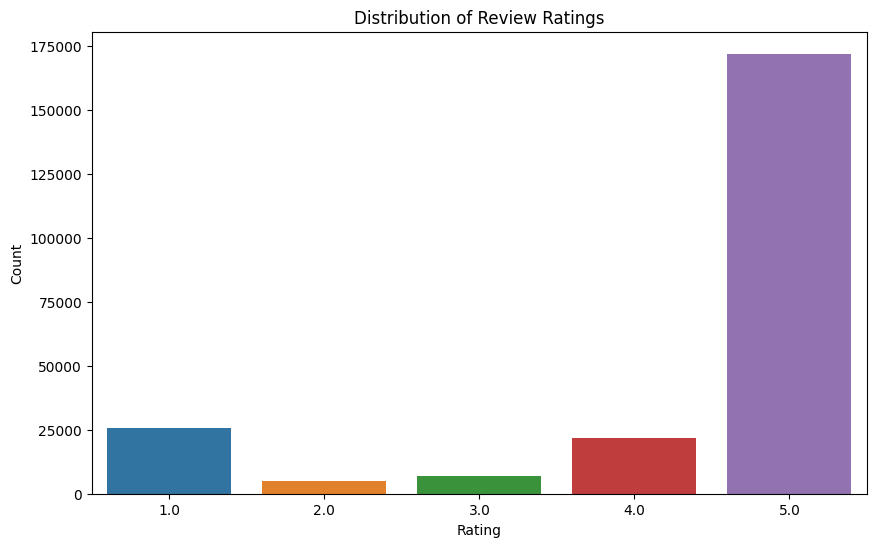

In [ ]:
# Plotting the distribution of review ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='review_rating', data=Master_df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


#### Review Text Length Analysis

In this section, the aim is to understand the distribution of the lengths of review texts in the dataset. Text length can often correlate with the sentiment expressed—longer reviews may provide more detailed feedback, while shorter reviews might indicate a more neutral stance or a lack of strong opinions.

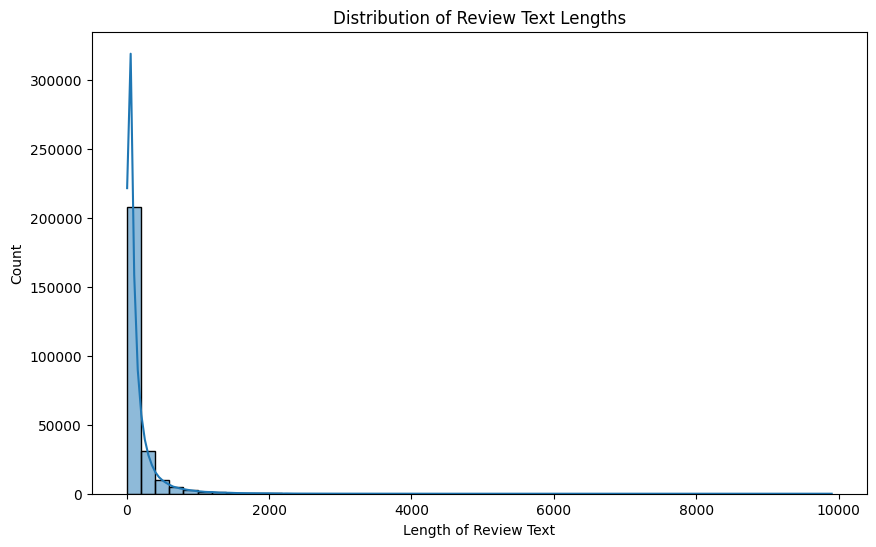

In [ ]:
# Adding a new column for review text length
Master_df['review_text_length'] = Master_df['review_text'].apply(len)

# Plotting the distribution of review text lengths
plt.figure(figsize=(10, 6))
sns.histplot(Master_df['review_text_length'], bins=50, kde=True)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Length of Review Text')
plt.ylabel('Count')
plt.show()


#### Word Frequency Analysis

To get a visual sense of the most frequently occurring words in the reviews,a word cloud was used. This visualization helps to quickly view the most prominent terms that customers mention in their feedback. Words that appear larger in the word cloud are more frequently occurring in the text data. This can be particularly useful to spot recurring themes at a glance, which might point to widespread issues or highlights in customer sentiment.

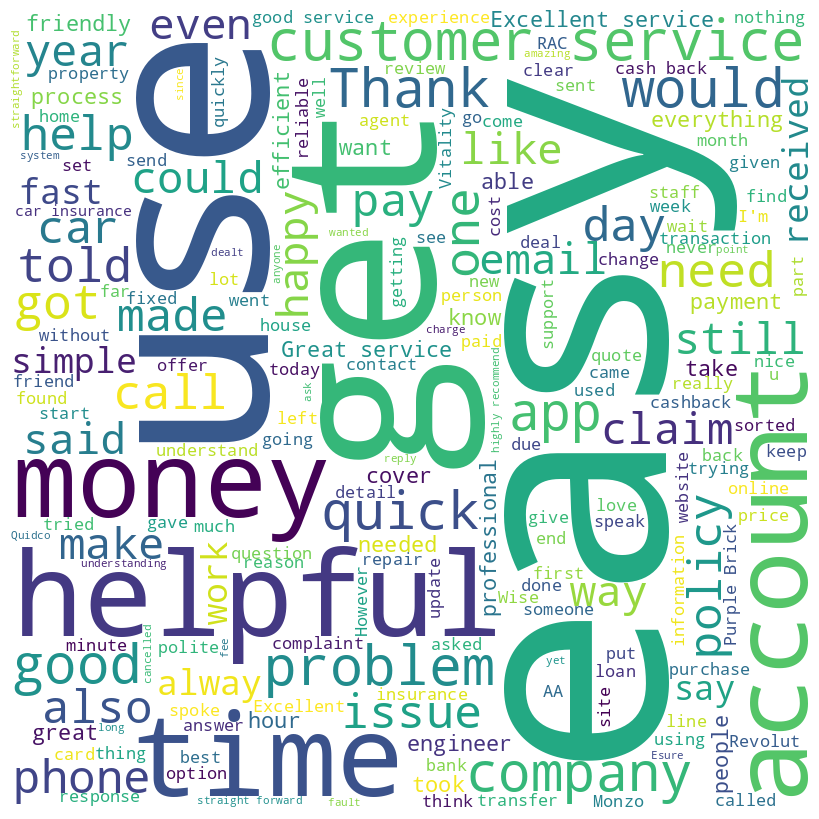

In [ ]:
# Function to create a word cloud
def plot_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(stopwords.words('english')),
                          min_font_size = 10).generate(text)

    # Plotting the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

# Combining all review texts into a single string
all_reviews = ' '.join(Master_df['review_text'])

# Generating and plotting word cloud
plot_word_cloud(all_reviews)


#### Feature Engineering and Sentiment scores

Sentiment polarity is a score that ranges from -1 to 1, where -1 indicates a highly negative sentiment, 1 indicates a highly positive sentiment, and values around 0 indicate neutral sentiment.

The TextBlob library was used to calculate the sentiment polarity for each review. This is a crucial step in sentiment analysis as it quantifies the emotional content of the texts and allows  to visualize the overall sentiment distribution.

A histogram overlaid with a kernel density estimate (KDE) gives  a visual summary of the sentiment polarity distribution.

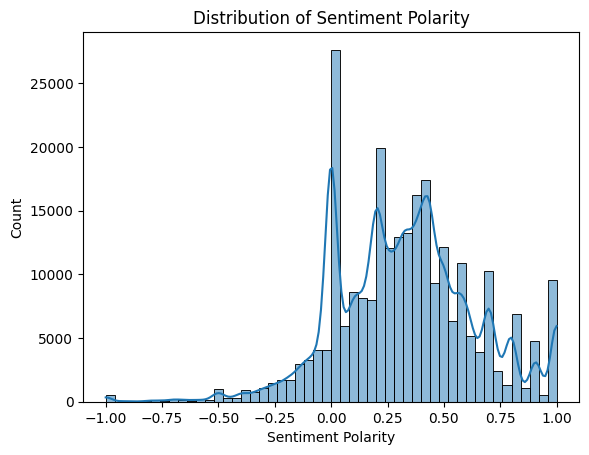

In [ ]:
# Calculating sentiment polarity for each review
Master_df['sentiment_polarity'] = Master_df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting the distribution of sentiment polarity
sns.histplot(Master_df['sentiment_polarity'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

In [ ]:
Master_df.head()

,business,review_title,date_of_experience,review_date,review_rating,review_text,page_number,review_text_length,sentiment_polarity
0,staysure,Helpful customer services,10 October 2023,2023-10-11,5.0,I took out new travel insurance online. I want...,1,471,0.140409
1,staysure,I have used Staysure foe many years,10 October 2023,2023-10-11,5.0,I have used Staysure foe many years. Fortunate...,1,308,0.445833
2,staysure,"Patient, helpful, thorough",29 September 2023,2023-10-11,5.0,"If you live with a complex health condition, i...",1,296,0.184091
3,staysure,Queries purchasing a Policy due for renewal,10 October 2023,2023-10-11,5.0,"We spoke with Emma today who was fantastic, sh...",1,263,0.297222
4,staysure,"great service, great experience",10 October 2023,2023-10-11,5.0,"David answered the phone, was friendly, patien...",1,261,0.458333


In [ ]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259899 entries, 0 to 259898
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business            259899 non-null  object 
 1   review_title        259899 non-null  object 
 2   date_of_experience  259899 non-null  object 
 3   review_date         259899 non-null  object 
 4   review_rating       231429 non-null  float64
 5   review_text         259899 non-null  object 
 6   page_number         259899 non-null  int64  
 7   review_text_length  259899 non-null  int64  
 8   sentiment_polarity  259899 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 17.8+ MB


This step involves some feature engineering where a new column called sentiment label is created and the polarity scores are mapped to a categorical word based on the defined threshold

In [ ]:
# Function to label sentiment based on polarity
def label_sentiment(polarity, threshold=0.1):
    if polarity > threshold:
        return 'Positive'
    elif polarity < -threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the labeling function to each sentiment polarity
Master_df['sentiment_label'] = Master_df['sentiment_polarity'].apply(label_sentiment)

In [ ]:
Master_df.head()

,business,review_title,date_of_experience,review_date,review_rating,review_text,page_number,review_text_length,sentiment_polarity,sentiment_label
0,staysure,Helpful customer services,10 October 2023,2023-10-11,5.0,I took out new travel insurance online. I want...,1,471,0.140409,Positive
1,staysure,I have used Staysure foe many years,10 October 2023,2023-10-11,5.0,I have used Staysure foe many years. Fortunate...,1,308,0.445833,Positive
2,staysure,"Patient, helpful, thorough",29 September 2023,2023-10-11,5.0,"If you live with a complex health condition, i...",1,296,0.184091,Positive
3,staysure,Queries purchasing a Policy due for renewal,10 October 2023,2023-10-11,5.0,"We spoke with Emma today who was fantastic, sh...",1,263,0.297222,Positive
4,staysure,"great service, great experience",10 October 2023,2023-10-11,5.0,"David answered the phone, was friendly, patien...",1,261,0.458333,Positive


#### Temporal Analysis

To understand how sentiments expressed in the reviews have evolved over time, a temporal analysis was conducted. This involves examining the average sentiment polarity for reviews and observing how this average changes from year to year. The analysis can reveal trends, such as whether sentiments become more positive or negative over time, and can also indicate the impact of external events on customer sentiment.

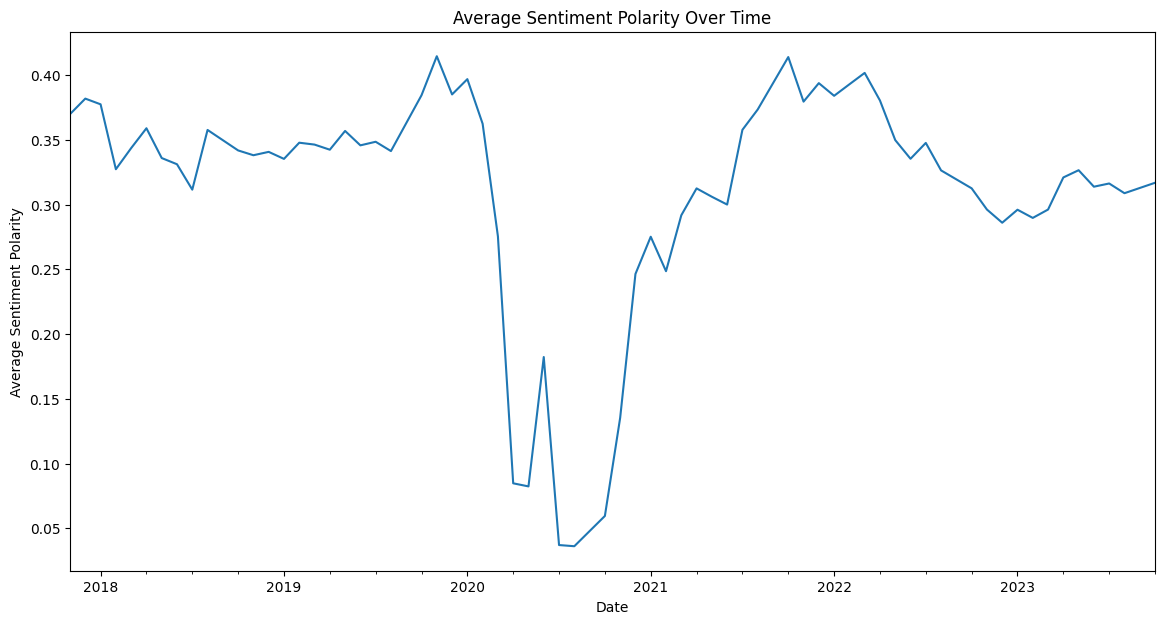

In [ ]:
# Converting review_date to datetime
Master_df['review_date'] = pd.to_datetime(Master_df['review_date'])

# Aggregating data by review_date and calculate mean sentiment polarity
temporal_sentiments = Master_df.groupby(Master_df['review_date'].dt.to_period("M"))['sentiment_polarity'].mean()

# Plotting the average sentiment polarity over time
temporal_sentiments.plot(title='Average Sentiment Polarity Over Time', figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.show()

#### Sentiment Polarities of Businesses

This involves ranking the businesses according to the average sentiment expressed in their reviews. This can provide insights into which businesses are perceived positively and which may require improvement.

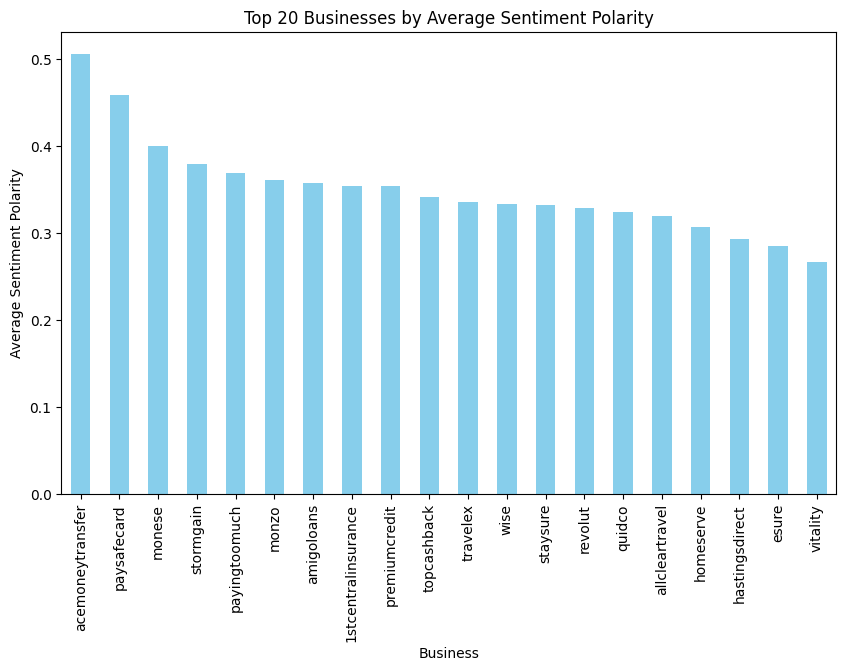

In [ ]:
# Counting the number of reviews per business
business_review_counts = Master_df['business'].value_counts()

# Calculating the average sentiment polarity per business
business_avg_sentiment = Master_df.groupby('business')['sentiment_polarity'].mean().sort_values(ascending=False)

# Plotting the average sentiment polarity for businesses with more than a threshold number of reviews to avoid bias from low counts
threshold = 50
filtered_business_avg_sentiment = business_avg_sentiment[business_review_counts > threshold]
plt.figure(figsize=(10, 6))
filtered_business_avg_sentiment.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Businesses by Average Sentiment Polarity')
plt.xlabel('Business')
plt.ylabel('Average Sentiment Polarity')
plt.show()

In [ ]:
# Counting the number of reviews for each business
review_volume_per_business = Master_df.groupby('business').size()

# Sorting the businesses by the number of reviews in descending order
sorted_review_volume = review_volume_per_business.sort_values(ascending=False)

top_businesses_by_volume = sorted_review_volume.head(20)
print(top_businesses_by_volume)

business
monzo                 10000
stormgain             10000
revolut               10000
domesticandgeneral    10000
purplebricks          10000
payingtoomuch          9999
rac                    9999
quidco                 9999
topcashback            9999
homeserve              9999
hastingsdirect         9999
monese                 9998
paysafecard            9998
wise                   9998
staysure               9998
allcleartravel         9998
worldremit             9998
lowell                 9997
esure                  9997
vitality               9997
dtype: int64


#### Outlier Analysis

The aim of this section is to identify businesses with unusual sentiment patterns, which could indicate inconsistent customer experiences or anomalies in the data.

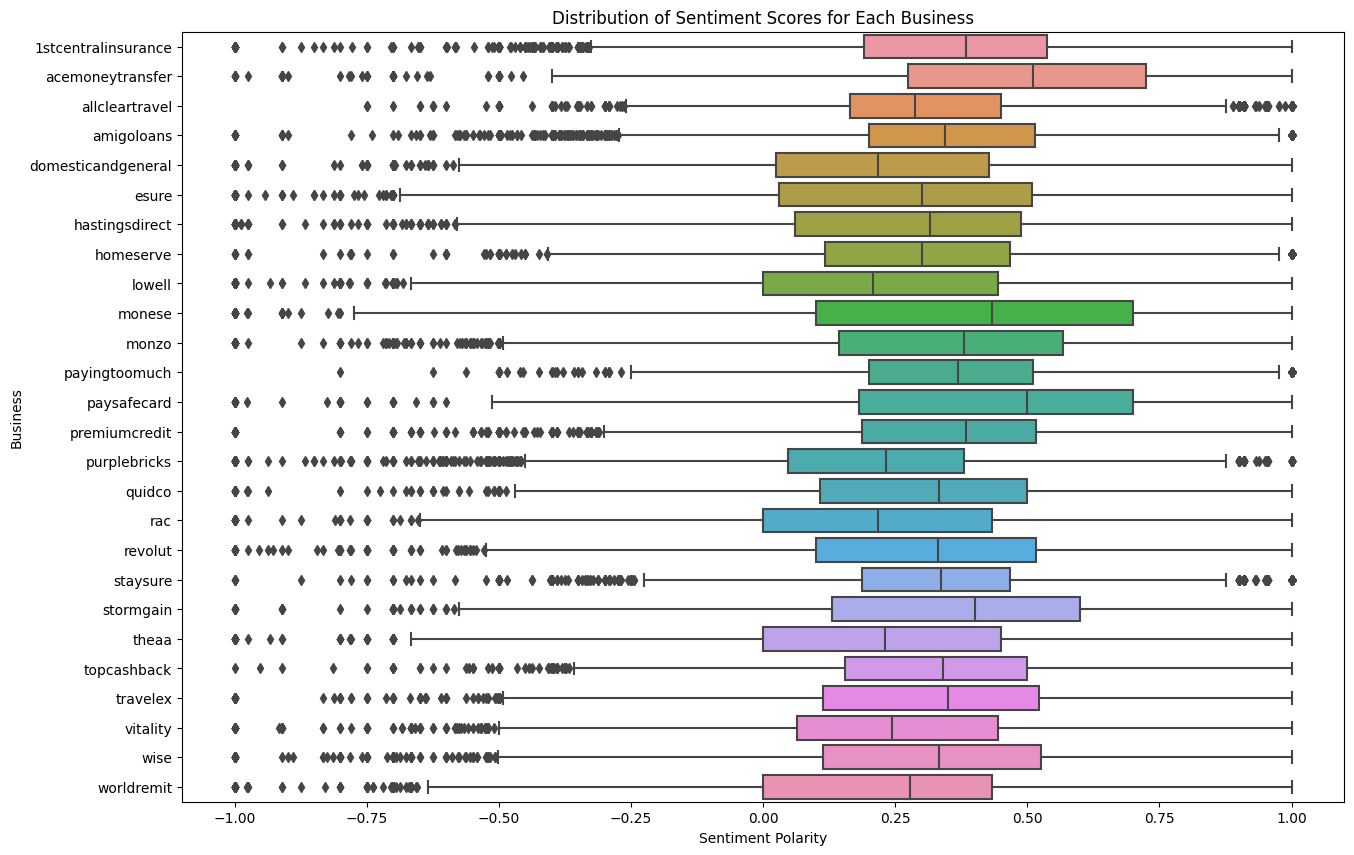

In [ ]:
threshold = 50 # Only consider businesses with more than 50 reviews
# Identifying businesses that meet the review count threshold
businesses_with_enough_reviews = review_volume_per_business[review_volume_per_business > threshold].index

# Filtering the DataFrame to include only businesses with more than the threshold number of reviews
filtered_reviews = Master_df[Master_df['business'].isin(businesses_with_enough_reviews)]

# Creating boxplots of sentiment scores for each business
plt.figure(figsize=(15, 10))
sns.boxplot(data=filtered_reviews, x='sentiment_polarity', y='business', orient='h', order=businesses_with_enough_reviews)
plt.title('Distribution of Sentiment Scores for Each Business')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Business')
plt.show()


######  Analyzing Outlier Sentiments Through Topic Modeling
Taking a closer look at the content of the outlier reviews to understand the specific issues or praises that drive these extreme sentiments. Outliers can be particularly insightful as they often represent the most passionate customer feedback

In [ ]:
# Calculate the Interquartile Range to identify outliers
Q1 = filtered_reviews['sentiment_polarity'].quantile(0.25)
Q3 = filtered_reviews['sentiment_polarity'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extracting outlier reviews
outlier_reviews = filtered_reviews[(filtered_reviews['sentiment_polarity'] < lower_bound) | (filtered_reviews['sentiment_polarity'] > upper_bound)]


In [ ]:
outlier_reviews

,business,review_title,date_of_experience,review_date,review_rating,review_text,page_number,review_text_length,sentiment_polarity,sentiment_label
811,staysure,Just one quirk. An annoying one!,07 October 2023,2023-10-07,3.0,Annoying that I was not easily able to alter t...,41,86,-0.525000,Negative
4809,staysure,Very difficult getting to create an…,22 September 2023,2023-10-09,1.0,Very difficult getting to create an account. H...,241,96,-0.675000,Negative
4811,staysure,You renewed my policy without telling…,22 September 2023,2023-10-09,1.0,You renewed my policy without telling me about...,241,92,-1.000000,Negative
5805,staysure,Disappointing to take renewal premium 33 days ...,18 September 2023,2023-10-09,4.0,I had notification of our policy expiry in Oct...,291,207,-0.780000,Negative
6128,staysure,Very expensive,10 September 2023,2023-10-09,3.0,Very expensive,307,14,-0.650000,Negative
...,...,...,...,...,...,...,...,...,...,...
257248,amigoloans,AVOID,22 October 2018,2018-10-22,NaN,AVOID. Don’t help customers at all and intrest...,368,333,-0.574444,Negative
257896,amigoloans,I was a guarantor for someone,03 July 2018,2018-07-03,2.0,I was a guarantor for someone. It was stated t...,400,823,-0.583333,Negative
258060,amigoloans,for a company that help with…,06 June 2018,2018-06-06,NaN,"for a company that help with guarantors,, this...",409,90,-0.910000,Negative
258629,amigoloans,Disgusting service,09 January 2018,2018-01-09,1.0,Disgusting service,437,18,-1.000000,Negative


In [ ]:
# Extracting the review text from the outliers
outlier_texts = outlier_reviews['review_text'].values

# Vectorize the review texts for LDA analysis
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(outlier_texts)

# Initialize and fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(dtm)

# Function to display topics created by LDA
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Calling this function to display the topics
display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 0:
worst money account service company terrible bank customer don use
Topic 1:
bad service communication customer waiting hours days shocking said time
Topic 2:
company insurance experience worst disgusting account trying bad car crap
Topic 3:
avoid shocking terrible customer card service worst absolutely company just
Topic 4:
service poor customer days terrible contact absolutely policy phone received
Topic 5:
account money hate just use app service bank experience awful
Topic 6:
awful service money customer don terrible bad company insurance experience
Topic 7:
hold company service need customer claim online speak phone money
Topic 8:
aa hours wait car breakdown times terrible expensive told waiting
Topic 9:
service disappointed customer company bad help worst time didn really


#### BiVariate Analysis

In investigating whether there is a relationship between the length of a review and the sentiment expressed within it. 

Intuitively, one might expect longer reviews to contain more detailed feedback, which could be either more critical (negative sentiment) or more expressive of satisfaction (positive sentiment).

A plot of sentiment polarity against review text length explores this.

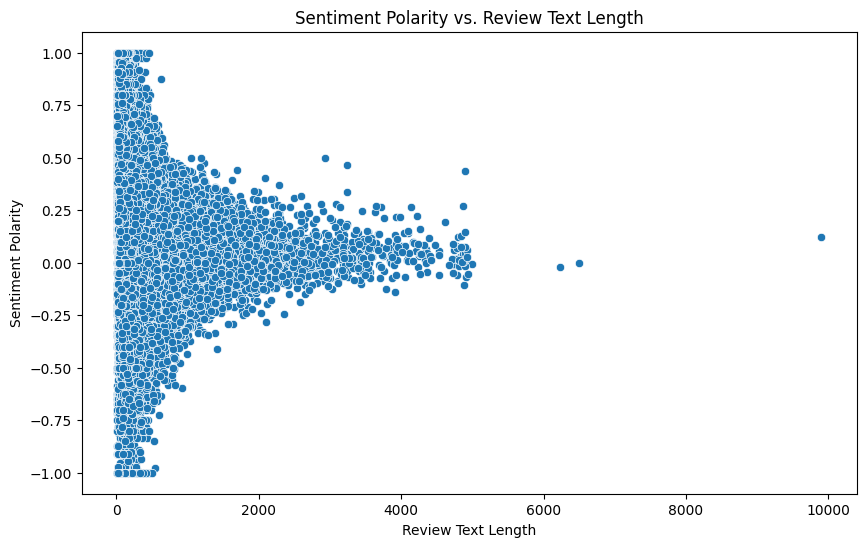

In [ ]:
# Plotting the relationship between review text length and sentiment polarity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_text_length', y='sentiment_polarity', data=Master_df)
plt.title('Sentiment Polarity vs. Review Text Length')
plt.xlabel('Review Text Length')
plt.ylabel('Sentiment Polarity')
plt.show()

##### Sentiment Polarity Trend Analysis:
looking  at the average sentiment polarity for each year to understand the overall sentiment trend.

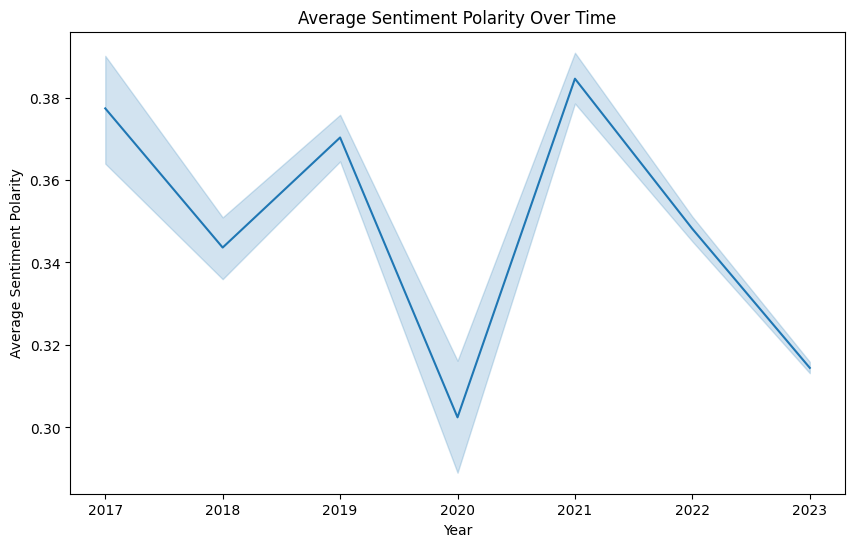

In [ ]:
# Extract the review year from the review_date column for trend analysis
Master_df['review_year'] = Master_df['review_date'].dt.year

# Plotting the average sentiment polarity over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='review_year', y='sentiment_polarity', data=Master_df, estimator='mean')
plt.title('Average Sentiment Polarity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Polarity')
plt.show()

##### N-Gram Analysis: Identifying Common Phrases
N-Gram analysis is a powerful tool in text analysis, helping to identify frequently occurring combinations of words. i was particularly interested in 4-grams to uncover common four-word phrases within the review texts. This can reveal patterns in customer feedback, highlighting aspects that customers frequently talk about.

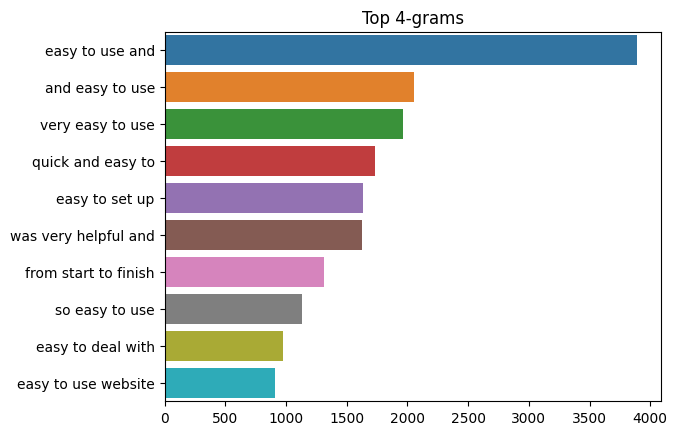

In [ ]:
# Function to plot most common N-grams
def plot_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:10]
    x,y = map(list,zip(*top_ngrams))
    sns.barplot(x=y,y=x)
    plt.title(f'Top {n}-grams')
    plt.show()

# Plotting the top 4-grams from the review text
plot_top_ngrams(Master_df['review_text'], n=4)

##### Sentiment labels after mapping

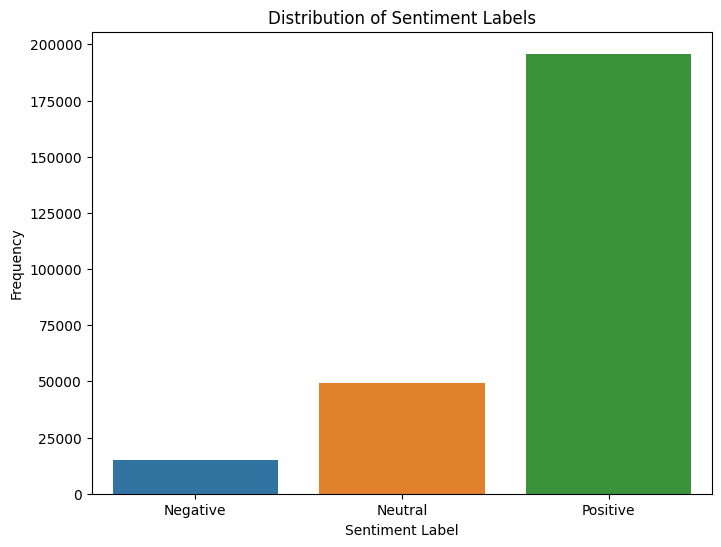

In [ ]:
#Plotting the mapped sentiment label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=Master_df, order=['Negative', 'Neutral', 'Positive'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Making a copy of the DataFrame
original_df = Master_df.copy()

# Save the DataFrame to a CSV file
original_df.to_csv('Original_Data.csv', index=False)

### Data Preprocessing

#### Lemmatizaton and Cleaning of text data

Before training the deep learning models for sentiment analysis, it's crucial to preprocess the text data. This preprocessing includes converting text to lowercase, transforming emojis into words, removing special characters, and excluding common stopwords. I also perform lemmatization, which reduces words to their base or root form. These steps help in reducing the complexity of the text and focusing on the most meaningful elements.

Moreover, since I am dealing with deep learning models that require numerical input, I will tokenize the text, converting words into numerical indices.

In [ ]:
# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert emojis in the text to words
def convert_emojis_to_text(text):
    return emoji.demojize(text)

# Function to clean and preprocess text data
def clean_text(text):
    text = text.lower()
    text = convert_emojis_to_text(text)  # Convert emojis to text
    text = re.sub(r'[\t\n\r\(\)]', ' ', text)
    text = re.sub(r'[^a-z ]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

# Applying the cleaning function to review texts
Master_df['cleaned_text'] = Master_df['review_text'].apply(clean_text)

In [ ]:
Master_df.head()

,business,review_title,date_of_experience,review_date,review_rating,review_text,page_number,review_text_length,sentiment_polarity,sentiment_label,review_year,cleaned_text
0,staysure,Helpful customer services,10 October 2023,2023-10-11,5.0,I took out new travel insurance online. I want...,1,471,0.140409,Positive,2023,took new travel insurance online wanted pay pr...
1,staysure,I have used Staysure foe many years,10 October 2023,2023-10-11,5.0,I have used Staysure foe many years. Fortunate...,1,308,0.445833,Positive,2023,used staysure foe many year fortunately needed...
2,staysure,"Patient, helpful, thorough",29 September 2023,2023-10-11,5.0,"If you live with a complex health condition, i...",1,296,0.184091,Positive,2023,live complex health condition important record...
3,staysure,Queries purchasing a Policy due for renewal,10 October 2023,2023-10-11,5.0,"We spoke with Emma today who was fantastic, sh...",1,263,0.297222,Positive,2023,spoke emma today fantastic lovely person speak...
4,staysure,"great service, great experience",10 October 2023,2023-10-11,5.0,"David answered the phone, was friendly, patien...",1,261,0.458333,Positive,2023,david answered phone friendly patient understa...


#### Tokenization

In [ ]:
# Initializing the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Master_df['cleaned_text'])

##### Data Preparation: Sequencing, Padding, and Splitting

After text preprocessing, I convert the sentiment labels into a numerical format that can be processed by the model. Given the categorical nature of the sentiment labels (Positive, Neutral, Negative), I map these to integers. Post that, I padded the tokenized sequences to ensure they all have the same length, which is a requirement for training neural networks.

Since machine learning models require a balanced dataset to perform optimally and avoid bias towards any class, I apply resampling to the training data.  using RandomOverSampler to balance the classes, ensuring that all sentiment categories are represented equally. This step is crucial for training a fair and unbiased model.

Lastly, I split the data into training and testing sets to validate the performance of our models after training.

In [ ]:
# Converting texts to sequences
sequences = tokenizer.texts_to_sequences(Master_df['cleaned_text'])

# Finding the maximum sequence length for model input
max_seq_length = max(len(x) for x in sequences)
max_seq_length

823

In [ ]:
# Printing the unique sentiment labels before mapping
print(Master_df['sentiment_label'].unique())

['Positive' 'Neutral' 'Negative']


In [ ]:
# Padding sequences
X_padded = pad_sequences(sequences, maxlen=max_seq_length)

# Mapping the sentiment labels to integers
sentiment_label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Applying the mapping to the 'sentiment_label' column
Master_df['sentiment_label'] = Master_df['sentiment_label'].map(sentiment_label_mapping)

# Verifying the mapping has worked correctly
print(Master_df['sentiment_label'].unique())

[2 1 0]


In [ ]:
# Splitting the data into training and testing sets (using integer labels)
X_train, X_test, y_train_int, y_test_int = train_test_split(
    X_padded,
    Master_df['sentiment_label'].values,
    test_size=0.3,
    random_state=42
)

In [ ]:
# Initializing the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resampling the training data to balance the classes
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_int)

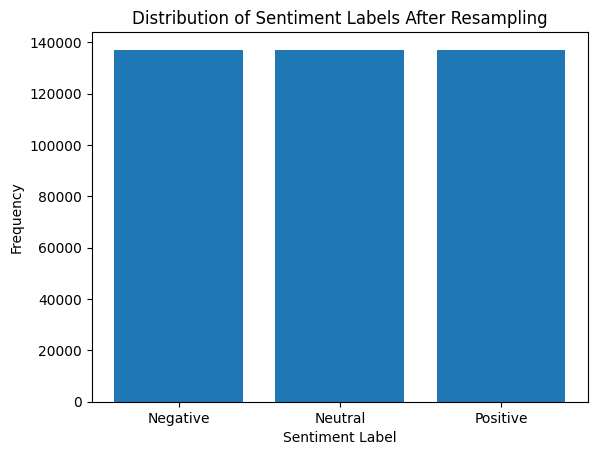

Counter({2: 137081, 1: 137081, 0: 137081})


In [ ]:
# Visualizing the class distribution after resampling
class_distribution = Counter(y_train_resampled)
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title('Distribution of Sentiment Labels After Resampling')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(ticks=list(sentiment_label_mapping.values()), labels=sentiment_label_mapping.keys())
plt.show()

print(class_distribution)

In [ ]:
# one-hot encoding the resampled labels
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test_int)

### LSTM Model Building and Training

This step involves building an LSTM model that includes an embedding layer for word representation, LSTM layers for sequence modeling, dropout layers for regularization, and a dense layer for classification.

To optimize the model's performance, I used early stopping and model checkpoints during training. Early stopping will halt the training if the validation loss doesn't improve, helping to prevent overfitting, and model checkpoints will save the best model weights.

After training, I plotted the accuracy and loss for both training and validation sets to visualize the model's learning progress and to assess overfitting.



In [ ]:
# Defining the LSTM model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))  # Dropout rate of 50%
model.add(Dense(3, activation='softmax'))  # 3 classes for Negative, Neutral, Positive

In [ ]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model summary for review
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 823, 100)          9306200   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 9348635 (35.66 MB)
Trainable params: 9348635 (35.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Setting up the early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Setting up a checkpoint to save the best model based on the validation loss
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Training the model
history = model.fit(X_train_resampled, y_train_resampled_categorical,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
10282/10282 [==============================] - ETA: 0s - loss: 0.2579 - accuracy: 0.9056
Epoch 1: val_loss improved from inf to 0.29893, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10282/10282 [==============================] - 374s 36ms/step - loss: 0.2579 - accuracy: 0.9056 - val_loss: 0.2989 - val_accuracy: 0.8987
Epoch 2/10
10282/10282 [==============================] - ETA: 0s - loss: 0.1290 - accuracy: 0.9552
Epoch 2: val_loss did not improve from 0.29893
10282/10282 [==============================] - 302s 29ms/step - loss: 0.1290 - accuracy: 0.9552 - val_loss: 0.3100 - val_accuracy: 0.8838
Epoch 3/10
10282/10282 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9687
Epoch 3: val_loss improved from 0.29893 to 0.18371, saving model to best_model.h5
10282/10282 [==============================] - 301s 29ms/step - loss: 0.0915 - accuracy: 0.9687 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 4/10
10282/10282 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9758
Epoch 4: val_loss improved from 0.18371 to 0.15445, saving model to best_model.h5
10282/10282 [==============================] - 301s 29ms/step - loss: 0.070

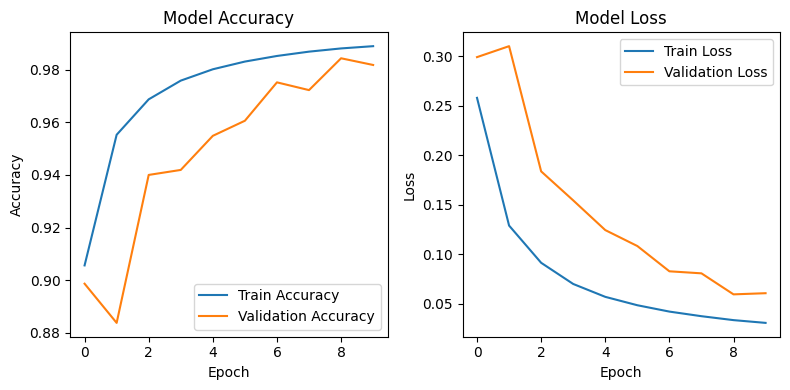

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation and Performance Metrics

The final stage of the analysis is to evaluate the best LSTM model, saved during training, against the unseen test data. looking at traditional classification metrics such as accuracy and loss, also delving deeper into the model's predictive power with a classification report, ROC curves, and a confusion matrix.

In [ ]:
# Loading the best model saved by ModelCheckpoint
best_model = load_model('best_model.h5')

# Evaluating the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test_categorical)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2437/2437 [==============================] - 27s 11ms/step - loss: 0.5562 - accuracy: 0.8980
Test Loss: 0.5561932921409607
Test Accuracy: 0.8979992270469666


In [ ]:
# Predict the probabilities or classes
test_predictions_prob = best_model.predict(X_test)
test_predictions = np.argmax(test_predictions_prob, axis=1)

# converting y_test to categorical form
y_test_integers = np.argmax(y_test_categorical, axis=1)

# Generating classification report
print(classification_report(y_test_integers, test_predictions, target_names=['Negative', 'Neutral', 'Positive']))

2437/2437 [==============================] - 26s 10ms/step
              precision    recall  f1-score   support

    Negative       0.73      0.64      0.68      4450
     Neutral       0.73      0.78      0.76     14761
    Positive       0.96      0.95      0.95     58759

    accuracy                           0.90     77970
   macro avg       0.80      0.79      0.80     77970
weighted avg       0.90      0.90      0.90     77970



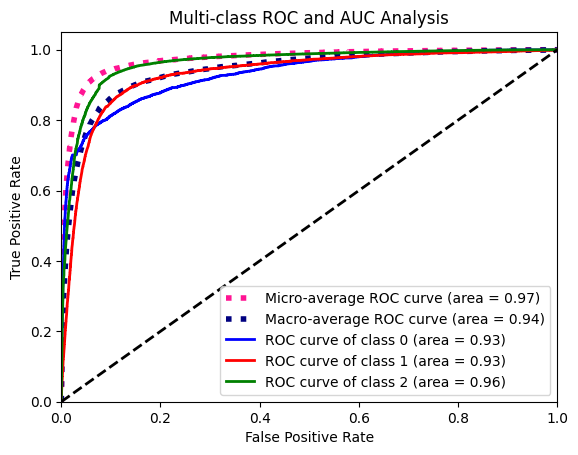

In [ ]:
# This code was modified from code obtained from https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

# Compute ROC curve and ROC area for each class
n_classes = y_test_categorical.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], test_predictions_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# averaging and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_categorical.ravel(), test_predictions_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plotting all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC and AUC Analysis')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Generating a confusion matrix
cm = confusion_matrix(y_test_integers, test_predictions)

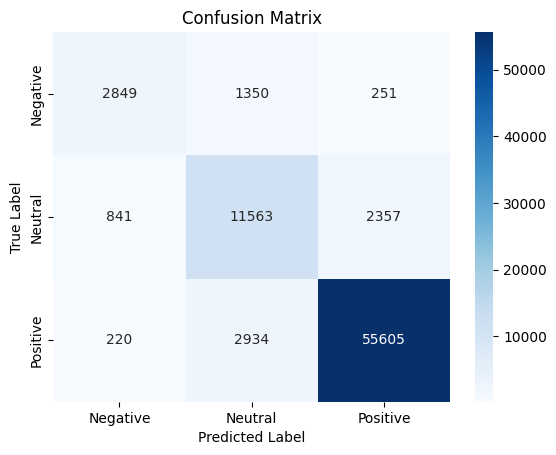

In [ ]:
# plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clear_session()

#### Cross-Validation and Class Weighting

To ensure the reliability of the LSTM model, I implemented a K-fold cross-validation strategy. Also, Given the imbalance in the class distribution, which can lead to overfitting, I computed class weights to give more representation to underrepresented classes during training. 

In [ ]:
# One-hot encode the entire set of labels
y_categorical = to_categorical(Master_df['sentiment_label'].values)

In [ ]:
# Defining K-fold cross validator
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect the scores
fold_no = 1
scores_per_fold = []
histories = []
confusion_matrices = []

for train_index, val_index in kf.split(X_padded, y_categorical):
    # Splitting the data
    X_train_fold, X_val_fold = X_padded[train_index], X_padded[val_index]
    y_train_fold, y_val_fold = y_categorical[train_index], y_categorical[val_index]

    # Apply resampling to the training data only
    ros = RandomOverSampler(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = ros.fit_resample(X_train_fold, np.argmax(y_train_fold, axis=1))

    # Convert labels back to categorical format after resampling
    y_train_fold_resampled_cat = to_categorical(y_train_fold_resampled)

    # Defining the model architecture
    model_fold = Sequential()
    model_fold.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
    model_fold.add(LSTM(64, return_sequences=False))
    model_fold.add(Dropout(0.5))  # Dropout rate of 50%
    model_fold.add(Dense(3, activation='softmax'))  # 3 classes for Negative, Neutral, Positive

    # Compiling the model
    model_fold.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Setting up the early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

    # Setting up a checkpoint to save the best model based on the validation loss
    model_checkpoint = ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)

    # Generating a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fitting data to model
    history_fold = model_fold.fit(X_train_fold_resampled, y_train_fold_resampled_cat,
                        batch_size=32,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint])

    histories.append(history_fold)

    # Predicting on validation set and compute confusion matrix
    y_val_pred = model_fold.predict(X_val_fold)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val_fold, axis=1)
    cm_val = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    confusion_matrices.append(cm_val)

    # Saving the scores
    scores = model_fold.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model_fold.metrics_names[0]} of {scores[0]}; {model_fold.metrics_names[1]} of {scores[1]*100}%')
    scores_per_fold.append(scores)

    # Increase fold number
    fold_no += 1

    # Clearing the TensorFlow session after each fold
    K.clear_session()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
12235/12235 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.9036
Epoch 1: val_loss improved from inf to 0.30102, saving model to best_model_fold_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12235/12235 [==============================] - 395s 32ms/step - loss: 0.2657 - accuracy: 0.9036 - val_loss: 0.3010 - val_accuracy: 0.8973
Epoch 2/10
12235/12235 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9601
Epoch 2: val_loss did not improve from 0.30102
12235/12235 [==============================] - 349s 29ms/step - loss: 0.1181 - accuracy: 0.9601 - val_loss: 0.3647 - val_accuracy: 0.9002
Epoch 3/10
12235/12235 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9736Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.30102
12235/12235 [==============================] - 346s 28ms/step - loss: 0.0790 - accuracy: 0.9736 - val_loss: 0.4104 - val_accuracy: 0.8971
Epoch 3: early stopping
2708/2708 [==============================] - 29s 10ms/step
Score for fold 1: loss of 0.3010186553001404; accuracy of 89.72793221473694%
------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12248/12248 [==============================] - 394s 32ms/step - loss: 0.2632 - accuracy: 0.9039 - val_loss: 0.2980 - val_accuracy: 0.8973
Epoch 2/10
12248/12248 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.9609
Epoch 2: val_loss did not improve from 0.29802
12248/12248 [==============================] - 350s 29ms/step - loss: 0.1149 - accuracy: 0.9609 - val_loss: 0.3441 - val_accuracy: 0.8993
Epoch 3/10
12248/12248 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9740Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.29802
12248/12248 [==============================] - 347s 28ms/step - loss: 0.0774 - accuracy: 0.9740 - val_loss: 0.4569 - val_accuracy: 0.8966
Epoch 3: early stopping
2708/2708 [==============================] - 29s 11ms/step
Score for fold 2: loss of 0.29801955819129944; accuracy of 89.73485827445984%
------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12239/12239 [==============================] - 396s 32ms/step - loss: 0.2686 - accuracy: 0.9015 - val_loss: 0.2970 - val_accuracy: 0.8999
Epoch 2/10
12239/12239 [==============================] - ETA: 0s - loss: 0.1173 - accuracy: 0.9603
Epoch 2: val_loss did not improve from 0.29695
12239/12239 [==============================] - 350s 29ms/step - loss: 0.1173 - accuracy: 0.9603 - val_loss: 0.3580 - val_accuracy: 0.8959
Epoch 3/10
12237/12239 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9738Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.29695
12239/12239 [==============================] - 350s 29ms/step - loss: 0.0790 - accuracy: 0.9738 - val_loss: 0.4412 - val_accuracy: 0.8969
Epoch 3: early stopping
2708/2708 [==============================] - 29s 11ms/step
Score for fold 3: loss of 0.2969537377357483; accuracy of 89.99457359313965%


##### Attempt at Using Class weights to Address overfitting

In [ ]:
# Calculating class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_int),
                                     y=y_train_int)

# Converting class_weights to a dictionary to pass to model.fit
class_weight_dict = dict(enumerate(class_weights))

# Defining K-fold cross validator
num_folds_weights = 3
kf_1 = KFold(n_splits=num_folds_weights, shuffle=True, random_state=42)

# Prepare to collect the scores
fold_no_wei = 1

scores_per_fold_2 = []
histories_2 = []
confusion_matrices_2 = []


for train_index, val_index in kf_1.split(X_padded, y_categorical):
    # Splitting the data
    X_train_fold_1, X_val_fold_1 = X_padded[train_index], X_padded[val_index]
    y_train_fold_1, y_val_fold_1 = y_categorical[train_index], y_categorical[val_index]

    # Apply resampling to the training data only
    ros = RandomOverSampler(random_state=42)
    X_train_fold_resampled_1, y_train_fold_resampled_1 = ros.fit_resample(X_train_fold_1, np.argmax(y_train_fold_1, axis=1))

    # Convert labels back to categorical format after resampling
    y_train_fold_resampled_cat_1 = to_categorical(y_train_fold_resampled_1)

    # Defining the model architecture
    model_fold_2 = Sequential()
    model_fold_2.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
    model_fold_2.add(LSTM(32, return_sequences=False))
    model_fold_2.add(Dropout(0.6))  # Dropout rate of 60%
    model_fold_2.add(Dense(3, activation='softmax'))  # 3 classes for Negative, Neutral, Positive

    # Compiling the model
    model_fold_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Setting up the early stopping
    early_stopping_1 = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

    # Setting up a checkpoint to save the best model based on the validation loss
    model_checkpoint_1 = ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no_wei} ...')

    # Fitting data to model
    history_2 = model_fold_2.fit(X_train_fold_resampled_1, y_train_fold_resampled_cat_1,
                        batch_size=32,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_val_fold_1, y_val_fold_1),
                        callbacks=[early_stopping_1, model_checkpoint_1],
                        class_weight=class_weight_dict)  # Add class weights


    histories_2.append(history_2)

    # Predicting on validation set and compute confusion matrix
    y_val_pred_1 = model_fold_2.predict(X_val_fold_1)
    y_val_pred_classes_1 = np.argmax(y_val_pred_1, axis=1)
    y_val_true_classes_1 = np.argmax(y_val_fold_1, axis=1)
    cm_2 = confusion_matrix(y_val_true_classes_1, y_val_pred_classes_1)
    confusion_matrices_2.append(cm_2)

    # Saving the scores
    scores_1 = model_fold_2.evaluate(X_val_fold_1, y_val_fold_1, verbose=0)
    print(f'Score for fold {fold_no_wei}: {model_fold_2.metrics_names[0]} of {scores_1[0]}; {model_fold_2.metrics_names[1]} of {scores_1[1]*100}%')
    scores_per_fold_2.append(scores_1 )

    # to Increase fold number
    fold_no_wei += 1

    # Clearing the TensorFlow session after each fold
    K.clear_session()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
12235/12235 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.8594
Epoch 1: val_loss improved from inf to 0.50558, saving model to best_model_fold_4.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12235/12235 [==============================] - 367s 30ms/step - loss: 0.5350 - accuracy: 0.8594 - val_loss: 0.5056 - val_accuracy: 0.8419
Epoch 2/10
12235/12235 [==============================] - ETA: 0s - loss: 0.2073 - accuracy: 0.9304
Epoch 2: val_loss did not improve from 0.50558
12235/12235 [==============================] - 326s 27ms/step - loss: 0.2073 - accuracy: 0.9304 - val_loss: 0.5108 - val_accuracy: 0.8574
Epoch 3/10
12235/12235 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9476Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.50558
12235/12235 [==============================] - 323s 26ms/step - loss: 0.1378 - accuracy: 0.9476 - val_loss: 0.5511 - val_accuracy: 0.8602
Epoch 3: early stopping
2708/2708 [==============================] - 29s 11ms/step
Score for fold 1: loss of 0.5055806040763855; accuracy of 84.18731689453125%
------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12248/12248 [==============================] - 372s 30ms/step - loss: 0.5401 - accuracy: 0.8578 - val_loss: 0.4998 - val_accuracy: 0.8397
Epoch 2/10
12248/12248 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.9310
Epoch 2: val_loss did not improve from 0.49985
12248/12248 [==============================] - 325s 27ms/step - loss: 0.2055 - accuracy: 0.9310 - val_loss: 0.5730 - val_accuracy: 0.8305
Epoch 3/10
12248/12248 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.9485Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.49985
12248/12248 [==============================] - 325s 27ms/step - loss: 0.1402 - accuracy: 0.9485 - val_loss: 0.6128 - val_accuracy: 0.8425
Epoch 3: early stopping
2708/2708 [==============================] - 29s 11ms/step
Score for fold 2: loss of 0.4998479187488556; accuracy of 83.96569490432739%
------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12239/12239 [==============================] - 378s 31ms/step - loss: 0.5519 - accuracy: 0.8542 - val_loss: 0.5157 - val_accuracy: 0.8311
Epoch 2/10
12238/12239 [============================>.] - ETA: 0s - loss: 0.2109 - accuracy: 0.9291
Epoch 2: val_loss did not improve from 0.51571
12239/12239 [==============================] - 327s 27ms/step - loss: 0.2109 - accuracy: 0.9291 - val_loss: 0.5329 - val_accuracy: 0.8529
Epoch 3/10
12239/12239 [==============================] - ETA: 0s - loss: 0.1448 - accuracy: 0.9463Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.51571
12239/12239 [==============================] - 335s 27ms/step - loss: 0.1448 - accuracy: 0.9463 - val_loss: 0.5174 - val_accuracy: 0.8593
Epoch 3: early stopping
2708/2708 [==============================] - 30s 11ms/step
Score for fold 3: loss of 0.5157138109207153; accuracy of 83.10689926147461%


In [ ]:
# == Post-training analysis ==
# Calculate and print the average accuracy and loss
average_scores = np.mean(scores_per_fold_2, axis=0)
print(f'Average scores for all folds:\n Loss: {average_scores[0]}\n Accuracy: {average_scores[1]*100}%')


Average scores for all folds:
 Loss: 0.5070474445819855
 Accuracy: 83.75330368677774%


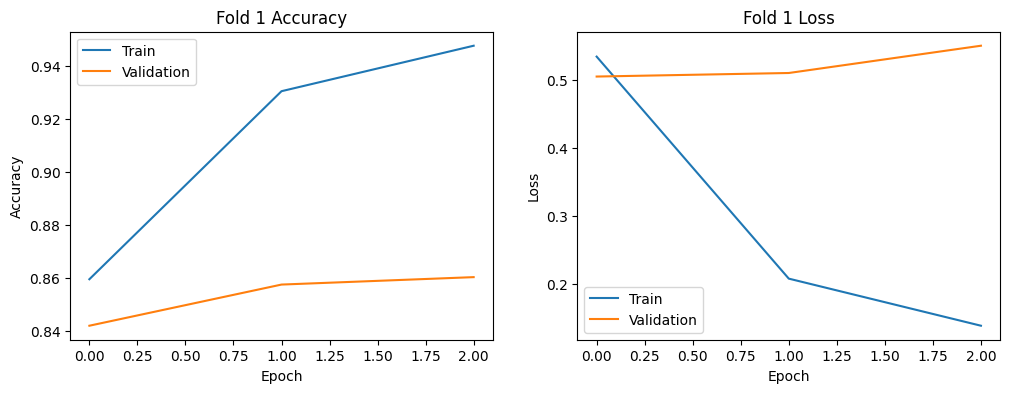

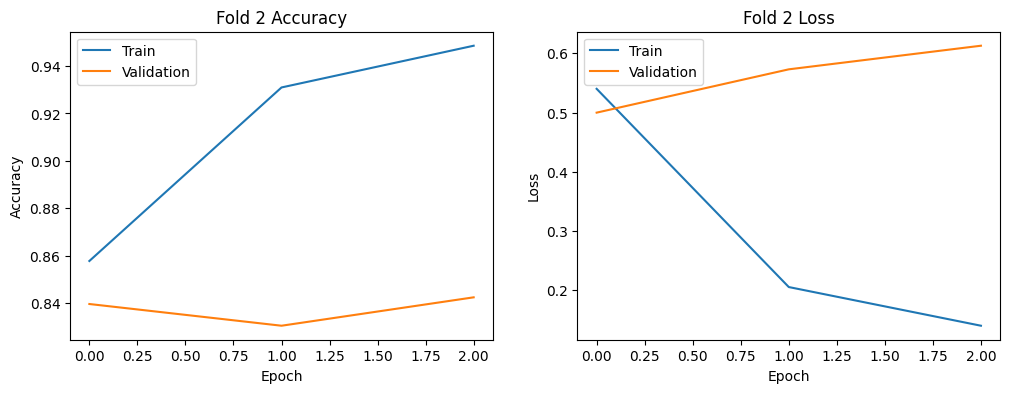

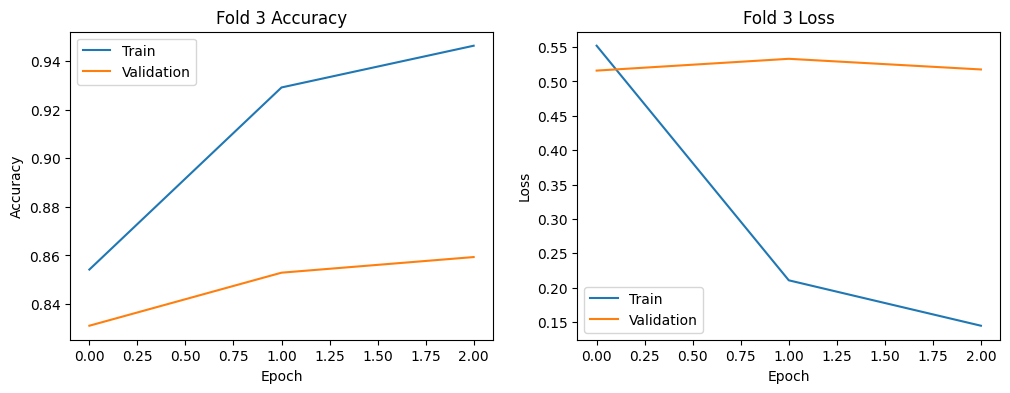

In [ ]:
# Plotting the training and validation loss and accuracy for each fold
for i, history in enumerate(histories_2):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Fold {i+1} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Fold {i+1} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

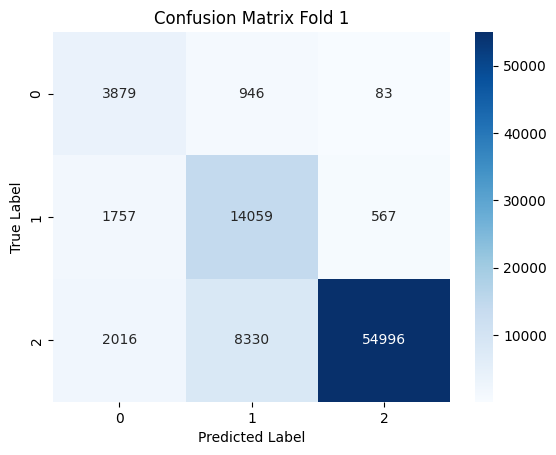

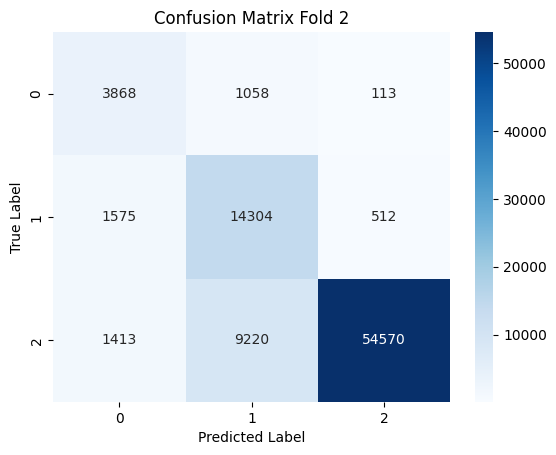

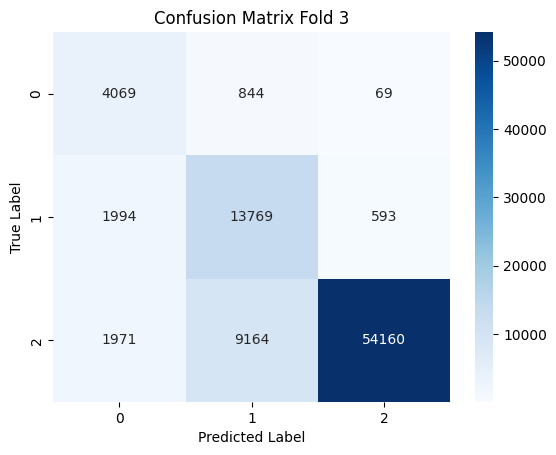

In [ ]:
# Plotting confusion matrices for each fold
for i, cm in enumerate(confusion_matrices_2):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix Fold {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Out-of-Domain (OOD) Testing

To assess the LSTM model's performance on data from a different domain, I conducted an OOD testing using a dataset of hotel reviews. This step is important to ensure that the model, trained on a specific dataset, can generalize to other text sources and maintain high performance.

Repetting the preprocessing steps employed earlier on the new dataset's text using the same cleaning function used for the original data. I then convert the review ratings into sentiment labels compatible with the  model's training labels. After transforming the text into padded sequences, I applied the trained model to predict the sentiments of the new reviews.

The final analysis involves comparing the predicted sentiment labels against the actual sentiment derived from the review ratings. A confusion matrix is plotted to visualize the model's performance, and overall accuracy is reported to quantify prediction success.

In [ ]:
Hotel_df=pd.read_csv('/content/drive/MyDrive/LSTM Script/Datafiniti_Hotel_Reviews_Jun19.csv')

In [ ]:
Hotel_df['processed_text'] = Hotel_df['reviews.text'].apply(clean_text)

In [ ]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive


# Applying the function to the 'review.rating' column to create a new 'sentiment_label' column
Hotel_df['sentiment_label'] = Hotel_df['reviews.rating'].apply(rating_to_sentiment)

In [ ]:
 #Converting texts to sequences using the tokenizer fitted on the original training data
new_sequences = tokenizer.texts_to_sequences(Hotel_df['processed_text'])

In [ ]:
# Padding sequences to the same length as training data
Hotel_df_padded = pad_sequences(new_sequences, maxlen=max_seq_length)

In [ ]:
new_predictions = best_model.predict(Hotel_df_padded)

313/313 [==============================] - 4s 11ms/step


In [ ]:
# Converting predictions to label indices
new_predictions_indices = np.argmax(new_predictions, axis=1)

In [ ]:
# Adding predictions to the new dataframe
Hotel_df['predicted_sentiment'] = new_predictions_indices

In [ ]:
# Mapping numeric predictions back to sentiment labels
sentiment_label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
Hotel_df['predicted_sentiment_label'] = Hotel_df['predicted_sentiment'].map(sentiment_label_mapping)

In [ ]:
Hotel_df['predicted_sentiment'].unique()

array([2, 1, 0])

In [ ]:
Hotel_df['predicted_sentiment_label'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
# Mapping from integer to string sentiment labels
int_to_str_sentiment = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Replacing integer labels with string labels in the DataFrame
Hotel_df['sentiment_label'] = Hotel_df['sentiment_label'].replace(int_to_str_sentiment)

In [ ]:
# Creating a cross-tabulation to compare actual and predicted sentiments
comparison = pd.crosstab(Hotel_df['sentiment_label'], Hotel_df['predicted_sentiment_label'])

accuracy = np.mean(Hotel_df['sentiment_label'] == Hotel_df['predicted_sentiment_label'])

In [ ]:
print(comparison)

predicted_sentiment_label  Negative  Neutral  Positive
sentiment_label                                       
Negative                        118      501       502
Neutral                           8      299       883
Positive                         16      456      7217


In [ ]:
print(f"Overall accuracy of sentiment prediction: {accuracy:.2f}")

Overall accuracy of sentiment prediction: 0.76


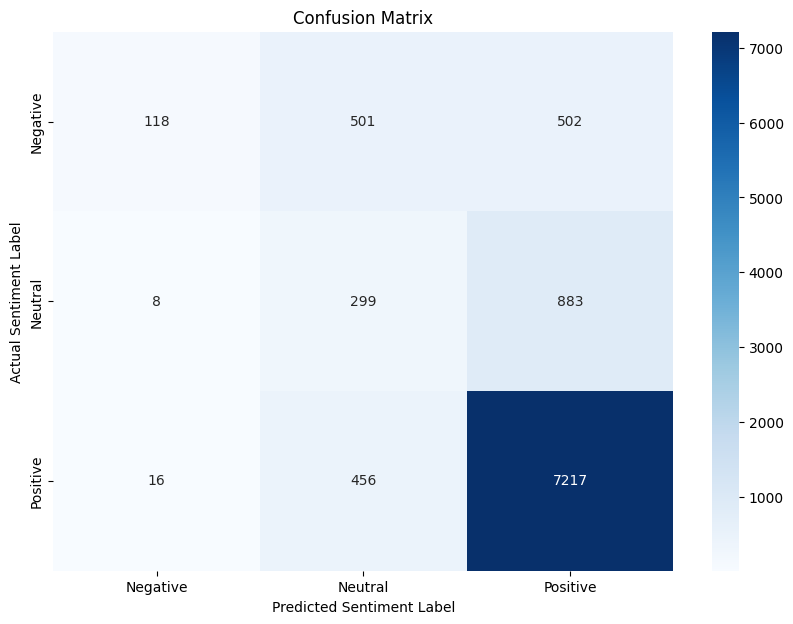

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(comparison, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment Label')
plt.ylabel('Actual Sentiment Label')
plt.show()

In [ ]:
Hotel_df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,processed_text,sentiment_label,predicted_sentiment,predicted_sentiment_label
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,hotel nice quiet know train track near train p...,Neutral,2,Positive
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,stayed king suite separation bedroom living sp...,Positive,2,Positive
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,parking horrible somebody ran rental car stayi...,Neutral,1,Neutral
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,cheap excellent location price somewhat standa...,Positive,2,Positive
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,get room advertised website paid may luckyif s...,Negative,2,Positive


In [ ]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to run the script: {total_time} seconds")

Total time taken to run the script: 10771.760394334793 seconds
